Datasetini bu linkten indirebilirsiniz. https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil

# Amazon 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("amazon.csv",encoding="iso-8859-1",parse_dates=["date"])

encoding="iso-8859-1" bu hatayı "Unicode Decode Error" hatası aldığımız için kullandık. 
parse_dates=["date"] ise tarih object olamayacağı için datetime modülüne çevirmek için kullandık.

In [9]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

Sırasıyla kütüphanelerimizi import ediyoruz.

# 1) Display Top 5 Rows of The Dataset#

In [15]:
data.head()  #--> İlk beş satırı getirecektir.

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [22]:
data.head(-5) #--> Sondaki beş satırı getirmeyecektir.

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6444,2007,Tocantins,Dezembro,13.0,2007-01-01
6445,2008,Tocantins,Dezembro,7.0,2008-01-01
6446,2009,Tocantins,Dezembro,46.0,2009-01-01
6447,2010,Tocantins,Dezembro,72.0,2010-01-01


# 2) Check Last 5 Rows #

In [16]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [23]:
data.tail(-5) #--> Baştaki ilk beş satırı silecektir.

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


# 3) Find Shape of Our Dataset (Number of Rows And Number of Columns) #

In [19]:
data.shape

(6454, 5)

In [24]:
print("Number of Rows:", data.shape[0]) #--> (a,b) a= Rows(Satır) b=Columns(Sütun) belirtir.
print("Number of Columns:", data.shape[1]) #--> İndex 0 Rows İndex 1 Columns

Number of Rows: 6454
Number of Columns: 5


# 4) Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement #

In [21]:
data.info() #--> Dataset hakkında bilgi almak istersek bu fonksiyonu kullanırız.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# 5) Check For Duplicate Data and Drop Them #

In [27]:
dup=data.duplicated().any() #--> Kopyalanmış herhangi bir satır var mı diye soruyoruz.
print("Are there any duplicated values in the data ?",dup) #--> Evet cevabını aldık.

Are there any duplicated values in the data ? True


In [30]:
data=data.drop_duplicates()

In [31]:
data.shape #--> 6454 - 6422 = 32 adet duplicate satır varmış 

(6422, 5)

# 6) Check Null Values In The Dataset #

In [33]:
data.isnull().sum() #--> Her bir sütunda toplam kaç tane NULL değer var saydırmak için kullanıyoruz.

year      0
state     0
month     0
number    0
date      0
dtype: int64

# 7) Get Overall Statistics About The Dataframe  #

In [36]:
data.describe() #--> Böyle dersek sadece numerik değerler gelecektir.

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [37]:
data.describe(include="all") #--> Bu şekilde uyarı verdi.Uyarıyı dinleyerek yeniden yazalım.

C:\Users\berkay\AppData\Local\Temp\ipykernel_11412\3772400700.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")


,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01 00:00:00
freq,NaN,697,540,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN


In [38]:
data.describe(include="all",datetime_is_numeric=True) # Dersek sorun çözülecektir

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


# 8) Rename Month Names To English #

In [39]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [42]:
data["month"].unique() #-->Month sütun içindeki unique değerler gelecektir. nunique dersek toplamlarını getirir.

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

Eğer isim değişikliği yapmak istiyorsak map fonksiyonunu kullanmalıyız.

In [44]:
data["Month_New"]=data["month"].map({"Janeiro":"Jan","Fevereiro":"Feb","Março":"Mar","Abril":"Apr","Maio":"May",
                                    "Junho":"June","Julho":"January","Agosto":"August","Setembro":"Sep",
                                    "Outubro":"Oct","Novembro":"Nov","Dezembro":"Dec"})

In [45]:
data.head() #--> Görüldüğü üzere yeni bir sütun oluşturmuş olduk.

,year,state,month,number,date,Month_New
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan


# 9) Total Number of Fires Registered #

In [46]:
data.shape #-->Shape attribute func pandas Kayıtlı(kopyalanmışlar silindi) 6422 adet yangın.

(6422, 6)

# 10) In Which Month Maximum Number of Forest Fires Were Reported? #

In [47]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month_New'], dtype='object')

In [53]:
data.groupby("Month_New")["number"].sum()

Month_New
Apr        28184.770
August     88050.435
Dec        57535.480
Feb        30839.050
Jan        47681.844
January    92319.113
June       55997.675
Mar        30709.405
May        34725.363
Nov        85508.054
Oct        88681.579
Sep        58578.305
Name: number, dtype: float64

In [52]:
data.groupby("Month_New")["number"].sum().sort_values(ascending=False).reset_index()
#-->reset_index() kullanarak daha net bir görüntü almış olduk.

,Month_New,number
0,January,92319.113
1,Oct,88681.579
2,August,88050.435
3,Nov,85508.054
4,Sep,58578.305
5,Dec,57535.480
6,June,55997.675
7,Jan,47681.844
8,May,34725.363
9,Feb,30839.050


In [54]:
dataone=data.groupby("Month_New")["number"].sum().sort_values(ascending=False).reset_index()

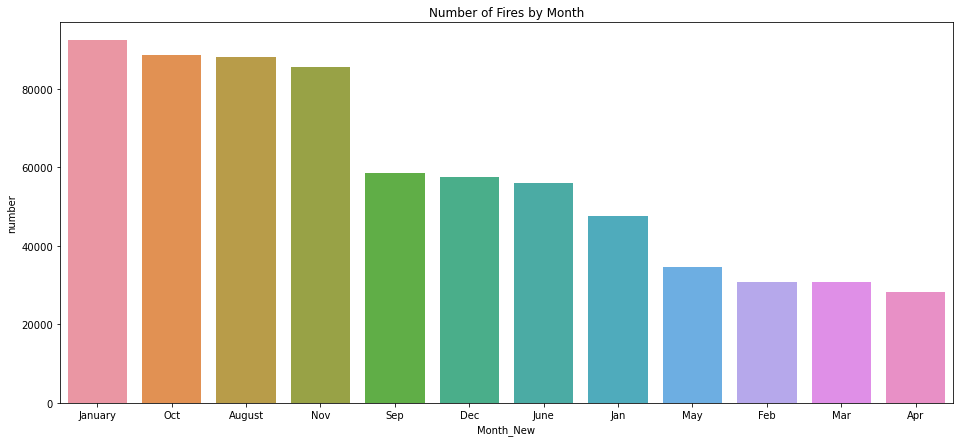

In [62]:
plt.figure(figsize=(16,7)) #--> Tablonun boyutunu ayarlamak için kullanıyoruz.
sns.barplot(x="Month_New",y="number",data=dataone) #-->şekildeki gibi görselleştirme yapabiliriz.
plt.title("Number of Fires by Month") #-->Başlık eklemek içinm kullanıyoruz.
plt.show() #--> Altta çıkan yazıları yok etmek için kullanıyoruz.

# 11) In Which Year Maximum Number of Forest Fires Was Reported? #

In [65]:
datatwo=data.groupby("year")["number"].sum().reset_index()

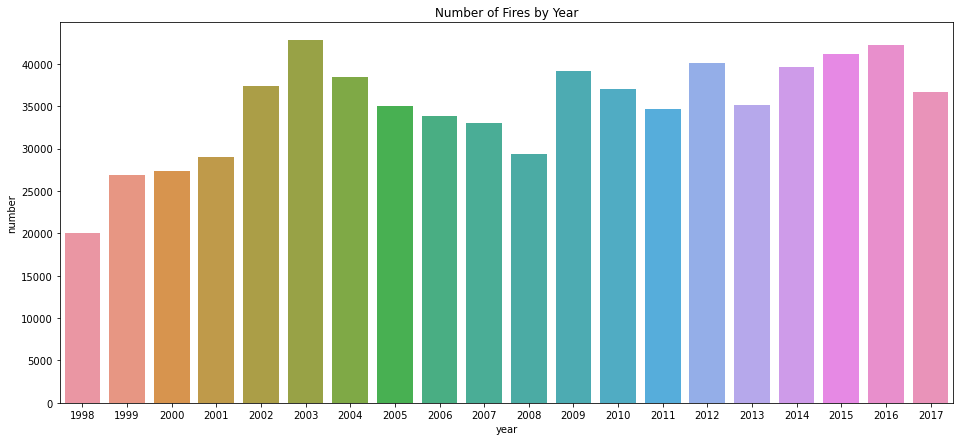

In [67]:
plt.figure(figsize=(16,7))
sns.barplot(x="year",y="number",data=datatwo)
plt.title("Number of Fires by Year")
plt.show()

In [70]:
data.groupby("year")["number"].sum().sort_values(ascending=False).reset_index() #--> Sayısal olarakta bu şekilde sıralayabiliriz.

,year,number
0,2003,42760.674
1,2016,42212.229
2,2015,41208.292
3,2012,40084.860
4,2014,39621.183
5,2009,39116.178
6,2004,38450.163
7,2002,37390.600
8,2010,37037.449
9,2017,36619.624


# 12) In Which State Maximum Number of Forest Fires Was Reported? #

In [74]:
datathree=data.groupby("state")["number"].sum().reset_index()

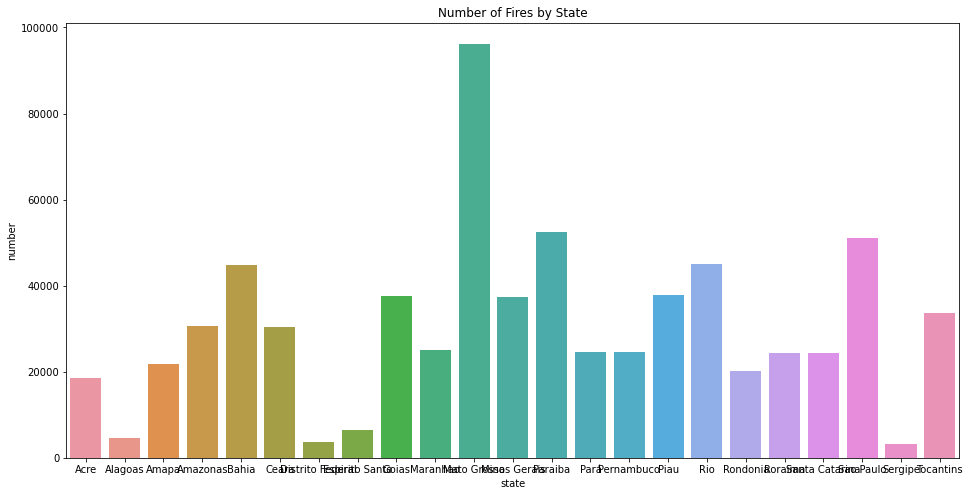

In [77]:
plt.figure(figsize=(16,8))
sns.barplot(x="state",y="number",data=datathree)
plt.title("Number of Fires by State")
plt.show()

Görüldüğü üzere şehir isimleri biribirine girmiş olarak gözükmektedir.Bunu şu şekilde düzeltelim.

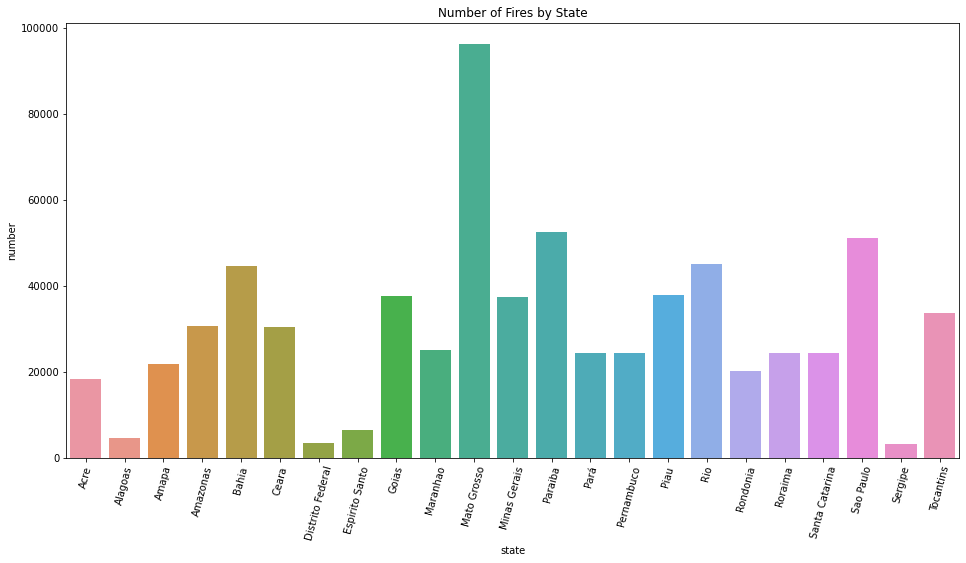

In [83]:
plt.figure(figsize=(16,8))
sns.barplot(x="state",y="number",data=datathree)
plt.xticks(rotation=75) #-->Görüldüğü üzere bu fonksiyonu(plt.xticks) yazarak düzelttik.
plt.title("Number of Fires by State")
plt.show()

# 13) Find Total Number of Fires Were Reported In Amazonas #

In [87]:
data[data["state"]=="Amazonas"]["number"].sum() #--> data["state"]=="Amazonas" sadece True False değeri döndürecektir.

30650.129

# 14) Display Number of Fires Were Reported In Amazonas (Year-Wise) #

In [93]:
datafour=data[data["state"]=="Amazonas"]

In [103]:
datafive=datafour.groupby("year")["number"].sum().sort_values().reset_index()
datafive

,year,number
0,2007,589.601
1,2000,853.000
2,2013,905.217
3,2017,906.905
4,1998,946.000
5,2006,997.640
6,1999,1061.000
7,2012,1110.641
8,2015,1189.994
9,2001,1297.000


<AxesSubplot:xlabel='year', ylabel='number'>

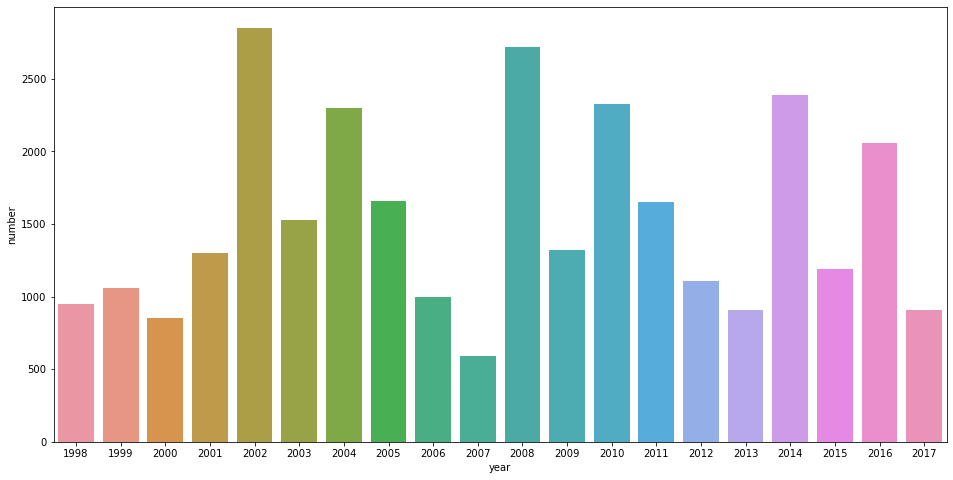

In [104]:
plt.figure(figsize=(16,8))
sns.barplot(x="year",y="number",data=datafive)

# 15) Display Number of Fires Were Reported In Amazonas (Day-Wise) #

In [109]:
datasix=data[data["state"]=="Amazonas"]
datasix

,year,state,month,number,date,Month_New
718,1998,Amazonas,Janeiro,0.0,1998-01-01,Jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,Jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,Jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,Jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,Jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,Dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,Dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,Dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,Dec


In [127]:
day=datasix.groupby(datasix["date"].dt.dayofweek).sum().number #--> Haftanın günlerini almak için kullandık.

In [128]:
import calendar

day.index=[calendar.day_name[x] for x in range(0,7)]
day.reset_index()

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


# 16) Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’ #

In [137]:
fire=data[data["year"]==2015].groupby("Month_New")["number"].sum().reset_index()
fire

,Month_New,number
0,Apr,2573.000
1,August,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,January,4364.392
6,June,3260.552
7,Mar,2202.000
8,May,2384.000
9,Nov,4034.518


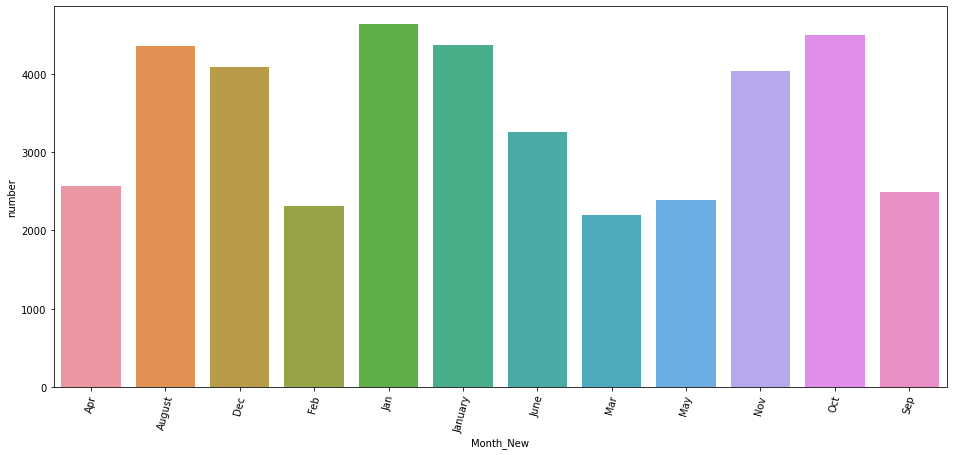

In [141]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=75)
sns.barplot(x="Month_New",y="number",data=fire)
plt.show()

# 17) Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise) #

In [157]:
dataeight=data.groupby("state")["number"].mean().sort_values(ascending=False).reset_index()

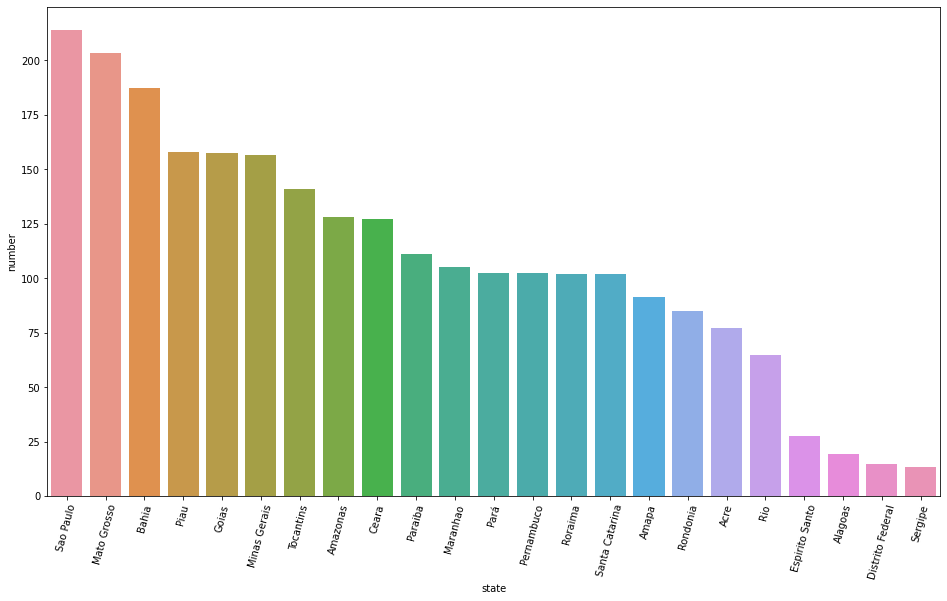

In [164]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=75)
sns.barplot(x="state",y="number",data=dataeight)
plt.show()

# 18) To Find The State Names Where Fires Were Reported In 'dec' Month #


In [170]:
data[data["Month_New"]=="Dec"]["state"].nunique() #-->Aralık ayında toplam kaç yerde yangın çıktığını görüyoruz.

23

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979
